<a href="https://colab.research.google.com/github/s34836/WUM/blob/main/Lab_05_Multilayer_Networks_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multilayer Networks 2
### Tasks
1. What loss function and output layer parameters (size, activation function) should be used for the following tasks?
    - Classification, 2 classes
    - Classification, >2 klasy
    - Regression
2. Write down the input/output shapes of each layer and calculate the total number of parameters in the networks below:
    - Network 1:
        - Input (size 16)
        - Hidden 1 (size 32)
        - Hidden 2 (size 16)
        - Output (size 10)
    - Network 2:
        - Input (size 64)
        - Hidden 1 (size 16)
        - Hidden 2 (size 8)
        - Output (1)
3. Classify the Reuters dataset using feed-forward networks.
    - Select the appropriate parameters of the output layer.
    - Test models with different sizes architectures. Create at least one model that underfits and one model that overfits.
    - For each model you train, plot the training and validation loss/accuracy.
    - Evaluate a selected model using the test set.

In [1]:
import tensorflow as tf
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.reuters.load_data(num_words=10000)

mlb = MultiLabelBinarizer()
mlb.fit(list(train_data) + list(test_data))
X_train_full = mlb.transform(train_data)
y_train_full = train_labels
X_test = mlb.transform(test_data)
y_test = test_labels

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=1)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



=== Trenuję UNDERFIT (8) ===


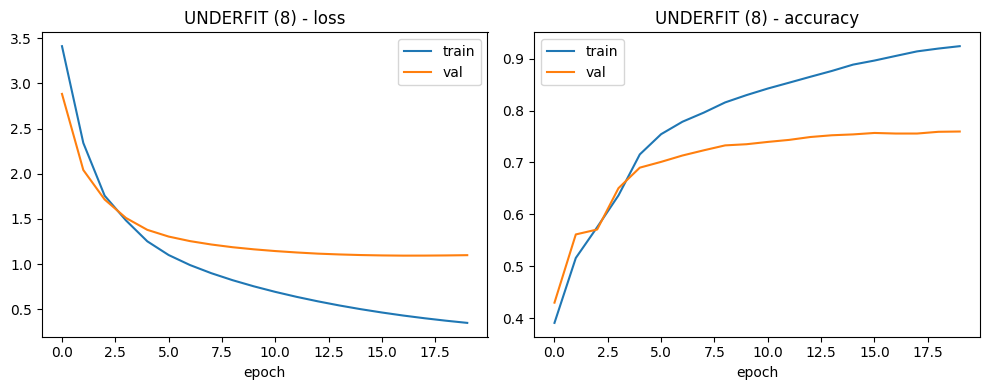


=== Trenuję REGULAR (128,64 + dropout) ===


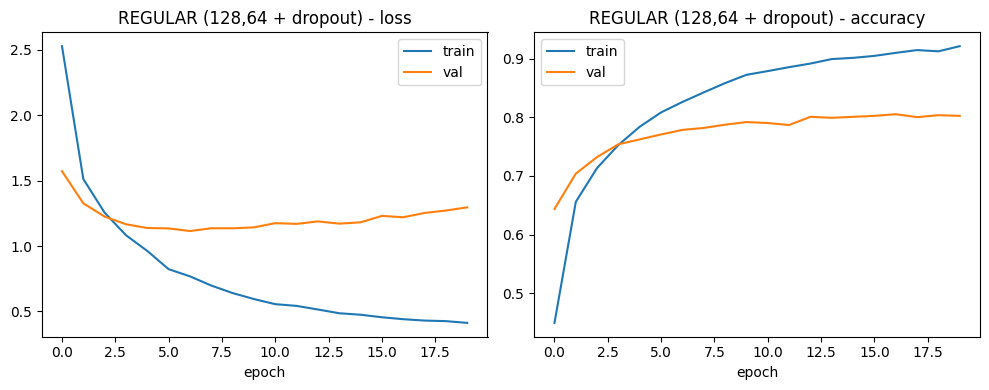


=== Trenuję OVERFIT (512,512) ===


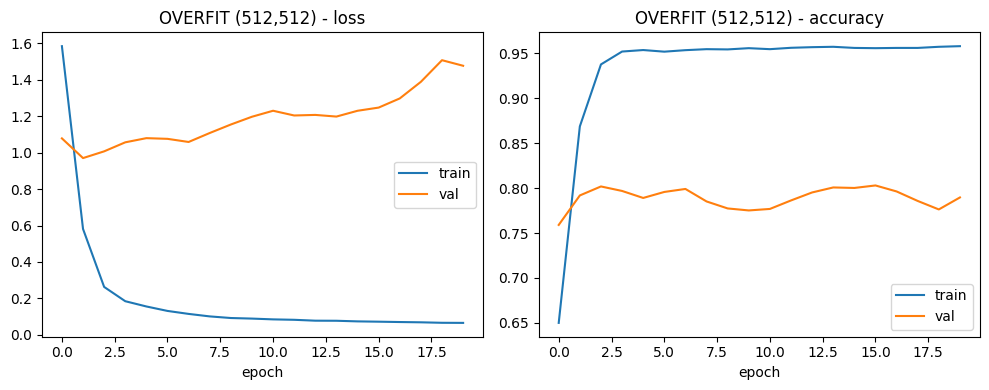


=== Test REGULAR ===
Test loss: 1.2839 | Test accuracy: 0.7965


In [2]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, regularizers, optimizers

np.random.seed(42)
tf.random.set_seed(42)

# Liczba klas (Reuters ma 46 tematów)
num_classes = int(np.max(y_train_full) + 1)

# Konwersja na float32 (Dense lubi floaty)
X_train = X_train.astype("float32")
X_valid = X_valid.astype("float32")
X_test  = X_test.astype("float32")

input_dim = X_train.shape[1]

def build_ffn(units, dropout=0.0, l2_reg=None):
    """Najprostszy MLP: [Dense+ReLU]* + Softmax(46)."""
    model = models.Sequential()
    for i, u in enumerate(units):
        if i == 0:
            model.add(layers.Dense(
                u, activation="relu", input_shape=(input_dim,),
                kernel_regularizer=regularizers.l2(l2_reg) if l2_reg else None
            ))
        else:
            model.add(layers.Dense(
                u, activation="relu",
                kernel_regularizer=regularizers.l2(l2_reg) if l2_reg else None
            ))
        if dropout and dropout > 0:
            model.add(layers.Dropout(dropout))
    model.add(layers.Dense(num_classes, activation="softmax"))
    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

def train_and_plot(name, model, epochs=20, batch_size=128):
    print(f"\n=== Trenuję {name} ===")
    hist = model.fit(
        X_train, y_train,
        validation_data=(X_valid, y_valid),
        epochs=epochs,
        batch_size=batch_size,
        verbose=0
    )
    # Wykresy: loss i accuracy (train vs val)
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    ax[0].plot(hist.history["loss"], label="train")
    ax[0].plot(hist.history["val_loss"], label="val")
    ax[0].set_title(f"{name} - loss"); ax[0].set_xlabel("epoch"); ax[0].legend()
    ax[1].plot(hist.history["accuracy"], label="train")
    ax[1].plot(hist.history["val_accuracy"], label="val")
    ax[1].set_title(f"{name} - accuracy"); ax[1].set_xlabel("epoch"); ax[1].legend()
    plt.tight_layout()
    plt.show()
    return hist, model

# 1) Model UNDERFIT: bardzo mało parametrów
underfit = build_ffn(units=[8], dropout=0.0, l2_reg=None)
h_underfit, m_underfit = train_and_plot("UNDERFIT (8)", underfit, epochs=20)

# 2) Model REGULAR (sensowny, z dropem)
regular = build_ffn(units=[128, 64], dropout=0.5, l2_reg=1e-4)
h_regular, m_regular = train_and_plot("REGULAR (128,64 + dropout)", regular, epochs=20)

# 3) Model OVERFIT: duży, bez regularyzacji
overfit = build_ffn(units=[512, 512], dropout=0.0, l2_reg=None)
h_overfit, m_overfit = train_and_plot("OVERFIT (512,512)", overfit, epochs=20)

# Ocena wybranego modelu na teście (weźmy REGULAR)
test_loss, test_acc = m_regular.evaluate(X_test.astype("float32"), y_test, verbose=0)
print(f"\n=== Test REGULAR ===\nTest loss: {test_loss:.4f} | Test accuracy: {test_acc:.4f}")

4. Create a network to predict house prices from the California Housing dataset.
    - You can load the data using [`tf.keras.datasets.california_housing.load_data()`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/california_housing/load_data). Split the data into a training, validation and test set, then standardize it.
    - Select the appropriate parameters of the output layer.
    - Select a model of appropriate size and architecture. Plot the training/validation error.
    - Evaluate the model using the test set.

743530/743530 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


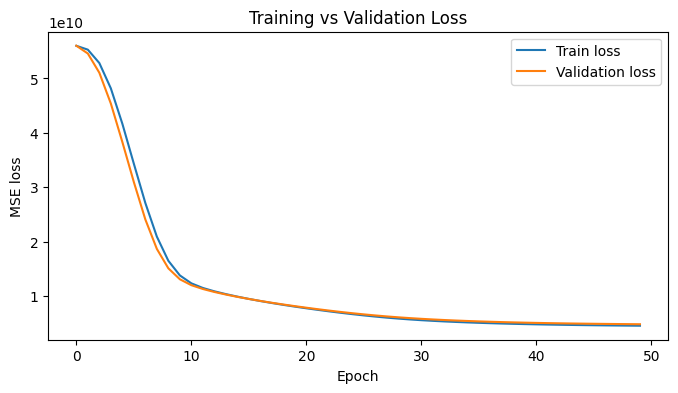

Test MSE: 4669784576.0000, Test MAE: 49642.0312


In [3]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
(X, y), (_, _) = tf.keras.datasets.california_housing.load_data()

# Train/val/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=1)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)  # regression → 1 neuron, no activation
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="mse",
    metrics=["mae"]  # mean absolute error for interpretation
)

# Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=50,
    batch_size=32,
    verbose=0
)

# Plot training/validation loss
plt.figure(figsize=(8,4))
plt.plot(history.history["loss"], label="Train loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("MSE loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

# Evaluate on test set
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MSE: {test_loss:.4f}, Test MAE: {test_mae:.4f}")